<a href="https://colab.research.google.com/github/SangHeeRho/bigdataclass_Machine-Learning/blob/main/COVID_19_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [113]:
df_patient = pd.read_csv('PatientInfo.csv')
df_patient.head(5)

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [114]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

데이터 결측치 확인

In [115]:
df_patient.isna().sum() # 너 값이 null 이니? 값이 null인 것 합하기

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

나이 (age) -> 20s -> 23 정확하게 숫자로 변경 -> 현재 년도 - 태어난년도 (birth_year) <br>
1. Null(Nan) 데이터를 처리 (Nan 계산 불가) -> 0으로 채우자 <br>
2. 나이 계산 시, 0 보다 큰 값은 (현재년도 - 태어난년도) 0보다 작으면 다시 Nan 채우기

In [116]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,0,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [117]:
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [118]:
# 0 보다 큰 값은 그대로 사용하고, 0인 값은 Nan으로 변환 -> 나이 계산 시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)

In [119]:
df_patient['age'] = 2021 - df_patient['birth_year']
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [120]:
patient = df_patient

2. 격리해제자(released) 데이터

In [121]:
#격리해제자 정보 담기
released = patient[patient.state == 'released']
released.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


격리해제자들의 연령대 분석

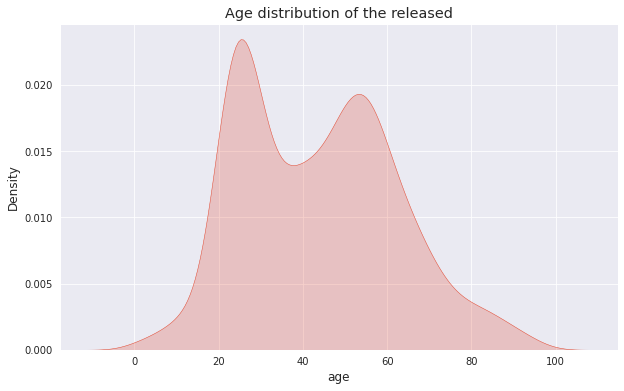

In [122]:
#격리해제자들의 연령대 분포
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'], shade=True)

격리된(isolated) 환자 데이터

In [123]:
# 격리된 환자의 정보
isolated_state = patient[patient.state == 'isolated']
isolated_state.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
14,1000000015,40.0,male,1943.0,78.0,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated
87,1000000088,3790.0,male,1975.0,46.0,Korea,Seoul,Gwangjin-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
101,1000000102,5666.0,female,1971.0,50.0,Korea,Seoul,Yongsan-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
130,1000000131,7401.0,female,1969.0,52.0,Korea,Seoul,Eunpyeong-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,2020-03-07,2020-03-09,NaN,NaN,isolated
132,1000000133,7514.0,female,1977.0,44.0,Korea,Seoul,Gangdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated


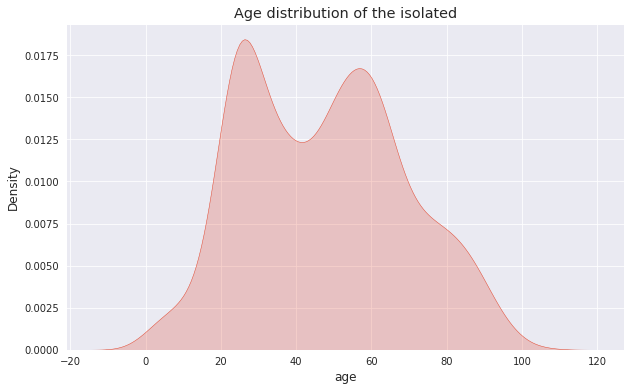

In [124]:
# 격리된(isolated) 환자의 연령대 별 데이터 분포
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data=isolated_state['age'], shade=True)


사망자(deceased) 데이터

In [125]:
#사망자의 정보

dead = patient[patient.state=='deceased']
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

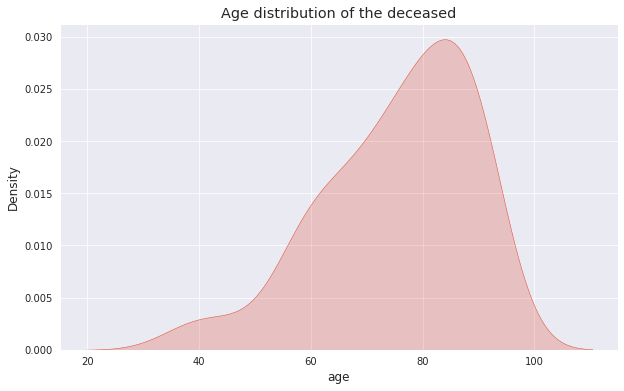

In [126]:
#사망자의 연령 분포
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True)

사망자에 따른 성별(gender) 데이터

In [127]:
male_dead = dead[dead.gender=='male']
female_dead = dead[dead.gender=='female']
print(male_dead)

      patient_id  global_num gender  ...  released_date  deceased_date     state
108   1000000109      6773.0   male  ...            NaN            NaN  deceased
284   1000000285      8602.0   male  ...            NaN            NaN  deceased
703   1100000071         NaN   male  ...            NaN            NaN  deceased
729   1100000097         NaN   male  ...            NaN            NaN  deceased
811   1200000114       114.0   male  ...            NaN     2020-02-26  deceased
812   1200000620       620.0   male  ...            NaN     2020-03-02  deceased
815   1200001288      1288.0   male  ...            NaN     2020-03-02  deceased
816   1200001443      1443.0   male  ...            NaN     2020-02-27  deceased
817   1200001921      1921.0   male  ...            NaN     2020-03-05  deceased
818   1200002085      2085.0   male  ...            NaN     2020-03-04  deceased
819   1200002289      2289.0   male  ...            NaN     2020-03-05  deceased
822   1200002936      2936.0

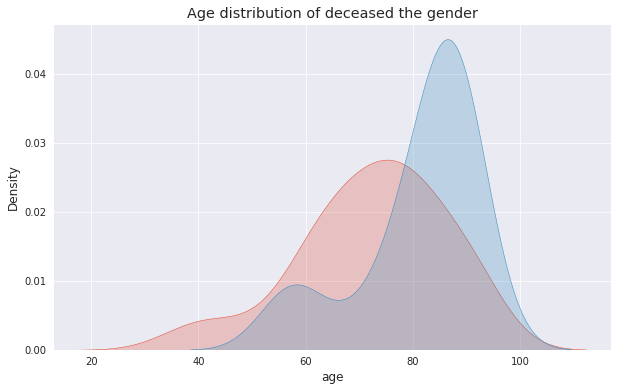

In [128]:
#성별에 따른 사망자의 연령분포
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of deceased the gender")
sns.kdeplot(data=male_dead['age'], label="Male", shade=True)
sns.kdeplot(data=female_dead['age'], label="Female", shade=True)

KDE : Kernel Density Estimator 추가한 kdeplt()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


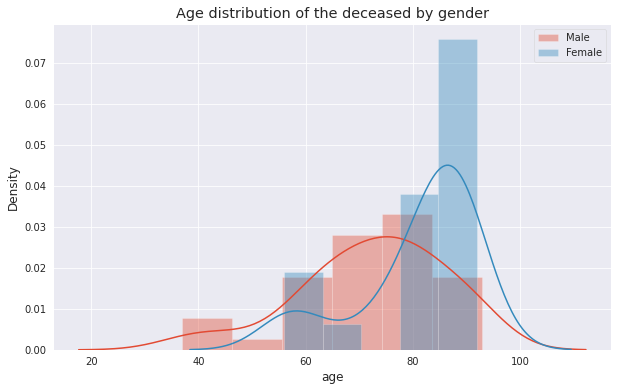

In [129]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.distplot(male_dead['age'], label="Male", kde=True)
sns.distplot(female_dead['age'], label="Female", kde=True)
plt.legend()

사망자 성별 비교 -> 바차트, 파이차트 -> 분포

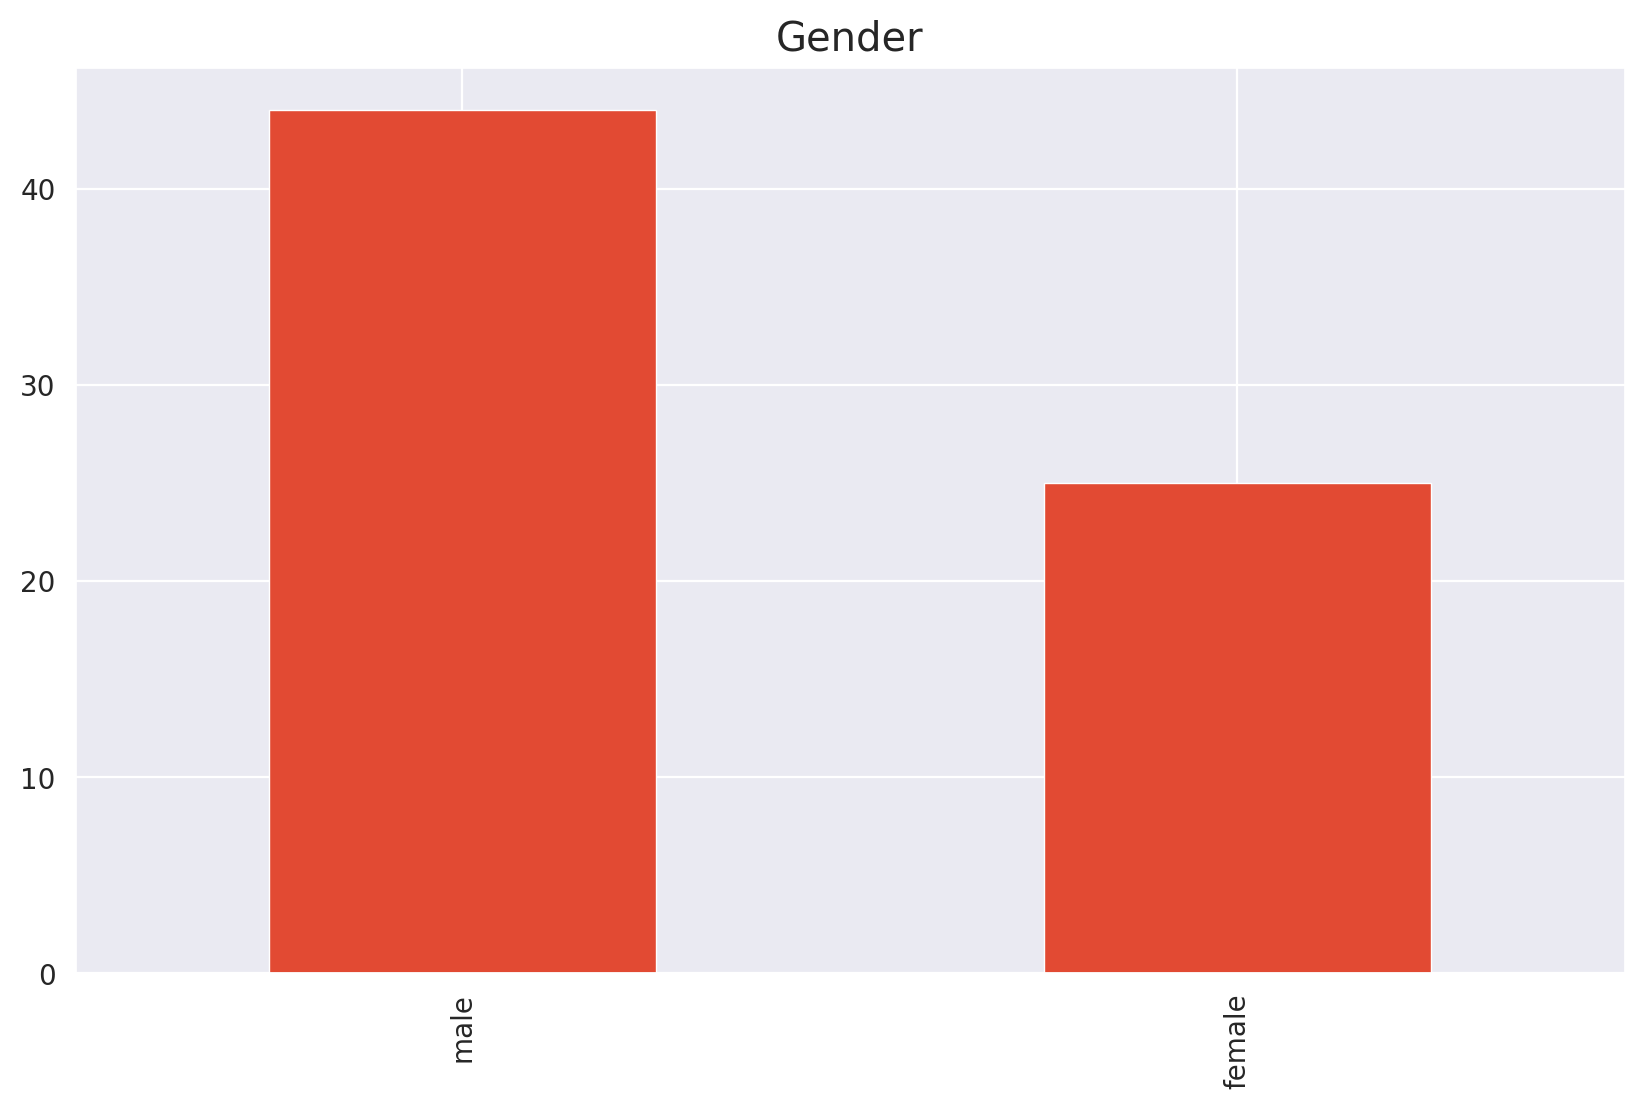

In [130]:
#성별에 따른 사망자의 연령 분포
plt.figure(figsize=(10,6), dpi=200)
plt.title("Gender")
dead.gender.value_counts().plot.bar()

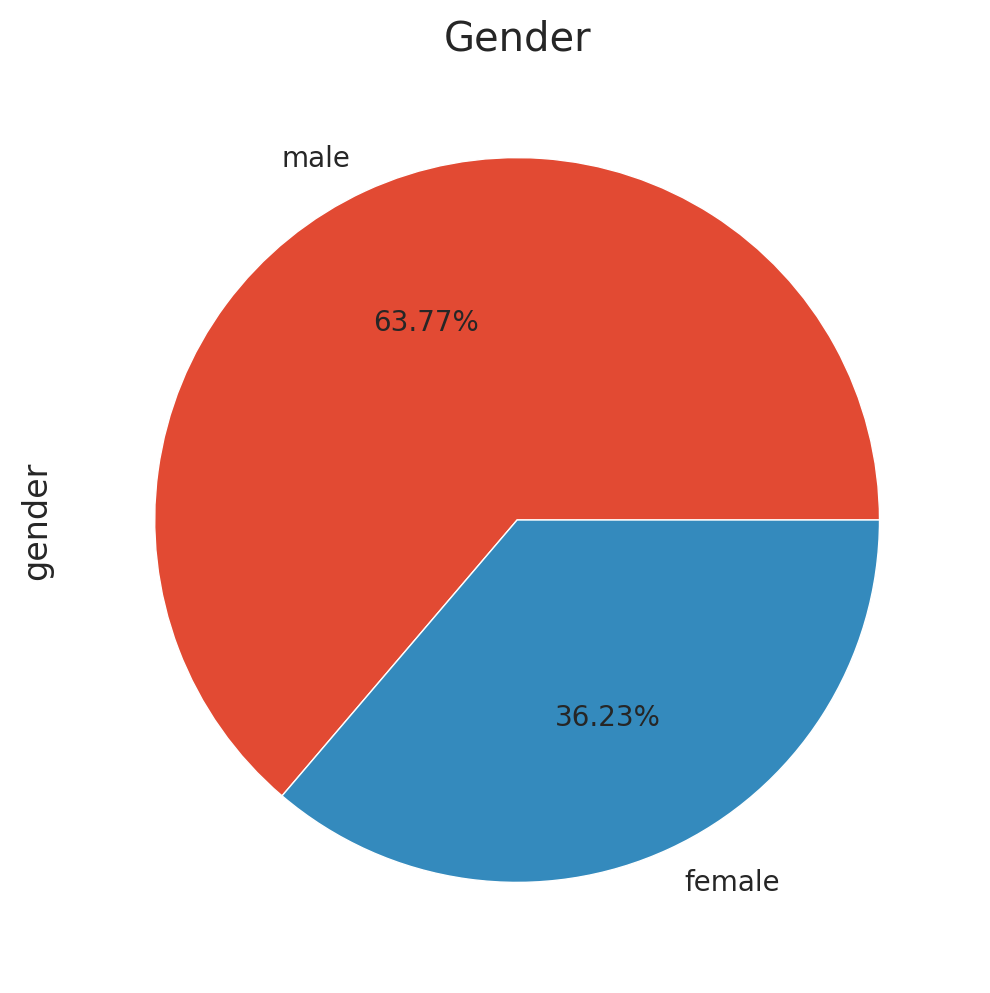

In [131]:
plt.figure(figsize=(10,6), dpi=200)
plt.title("Gender")
dead.gender.value_counts().plot.pie(autopct = '%.2f%%')

환자 유형별 (격리해제자, 격리중인 환자, 사망자) 연령 분포

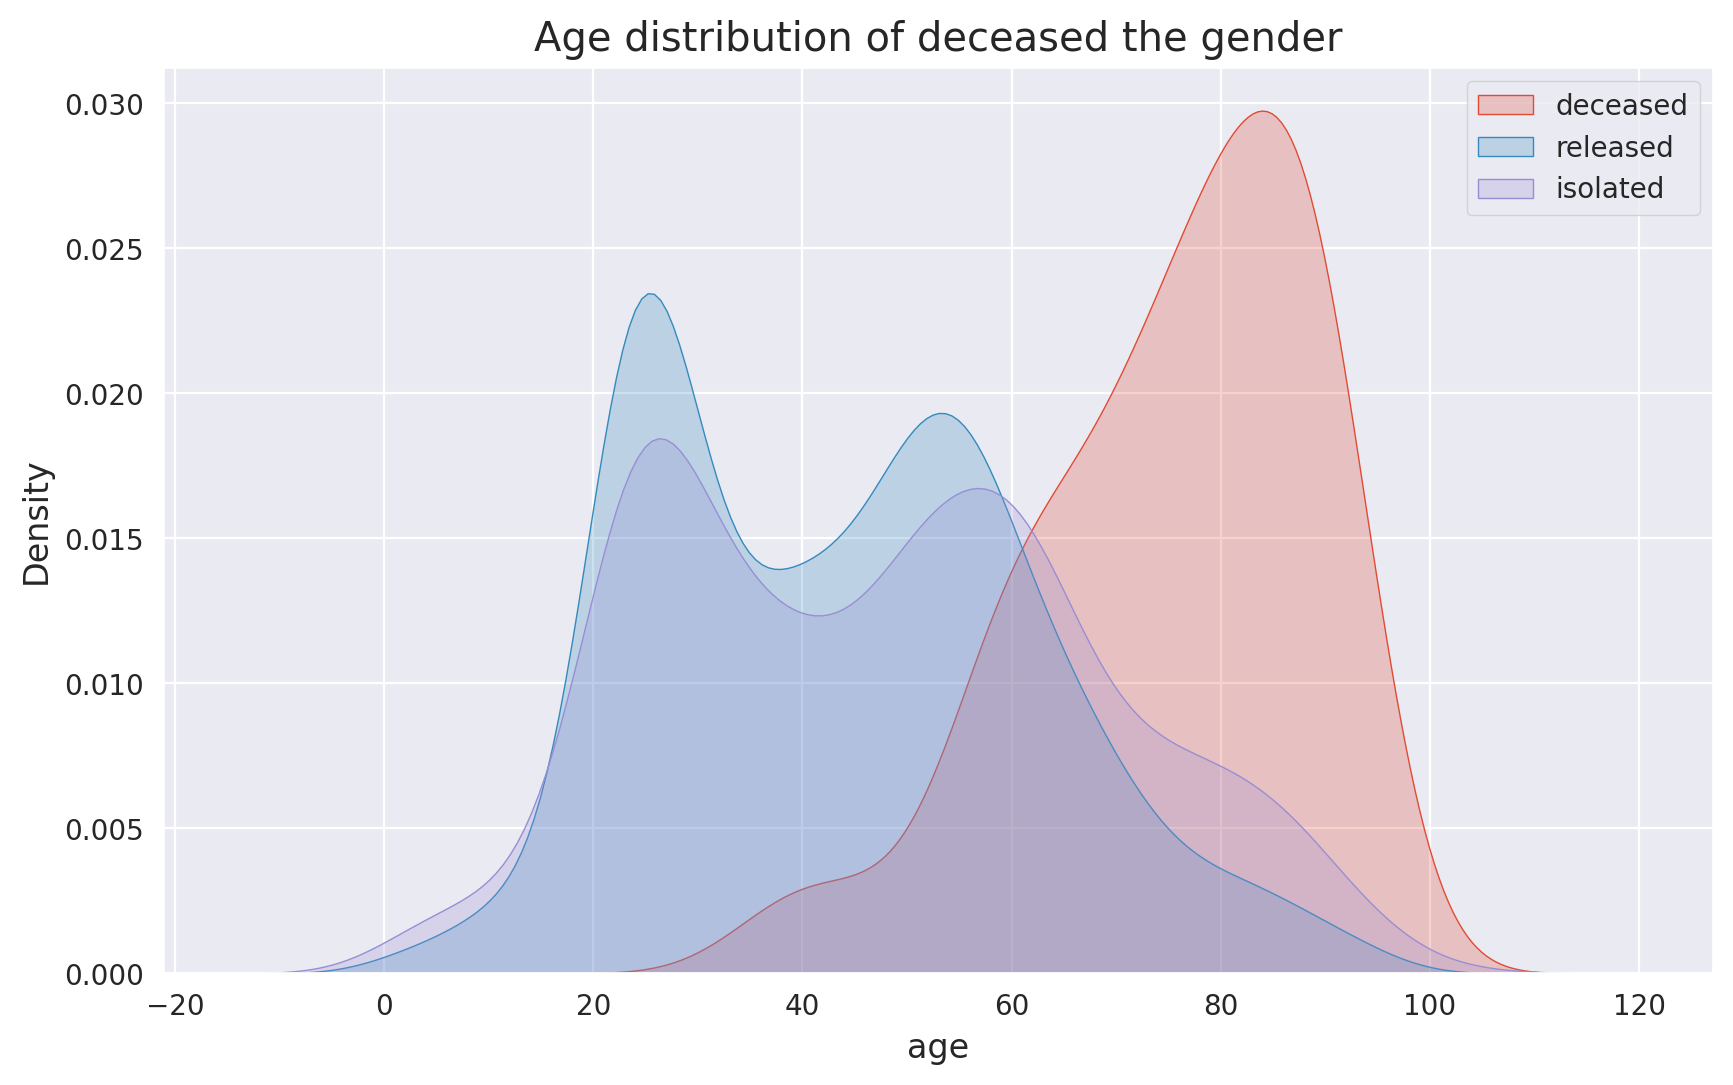

In [132]:
plt.figure(figsize=(10,6), dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of deceased the gender")
sns.kdeplot(data=dead['age'], label="deceased", shade=True)
sns.kdeplot(data=released['age'], label="released", shade=True)
sns.kdeplot(data=isolated_state['age'], label="isolated", shade=True)
plt.legend()

저희 환자 유형별 (격래해제자, 격리중, 사망) 비율 파이차트로 그려보세요

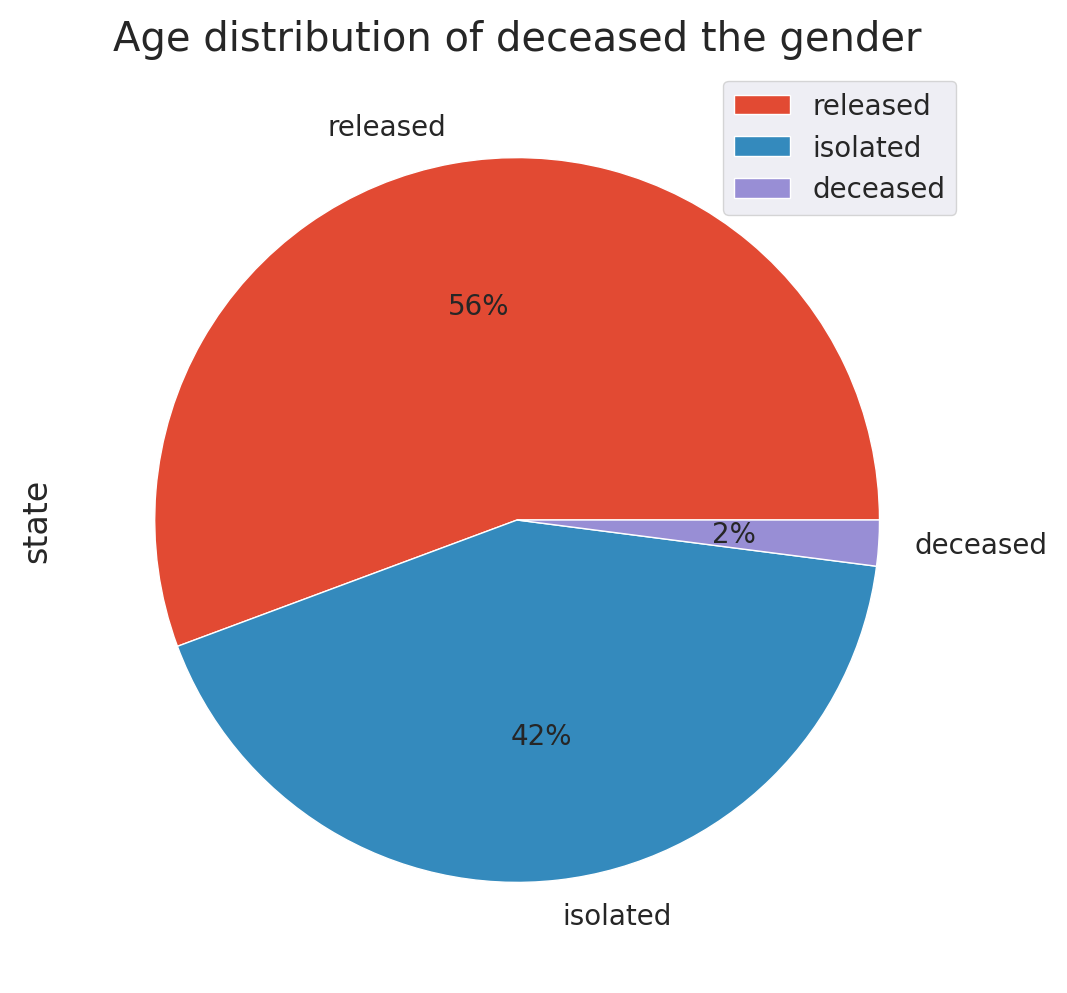

In [133]:
plt.figure(figsize=(10,6), dpi=200)
sns.set_style("darkgrid")
plt.title("Age distribution of deceased the gender")
explode = [0.2,0,0]
df_patient.state.value_counts().plot.pie(autopct = '%.f%%')
plt.legend()

성별, 날짜별 사망자 수 꺾은선 그래프

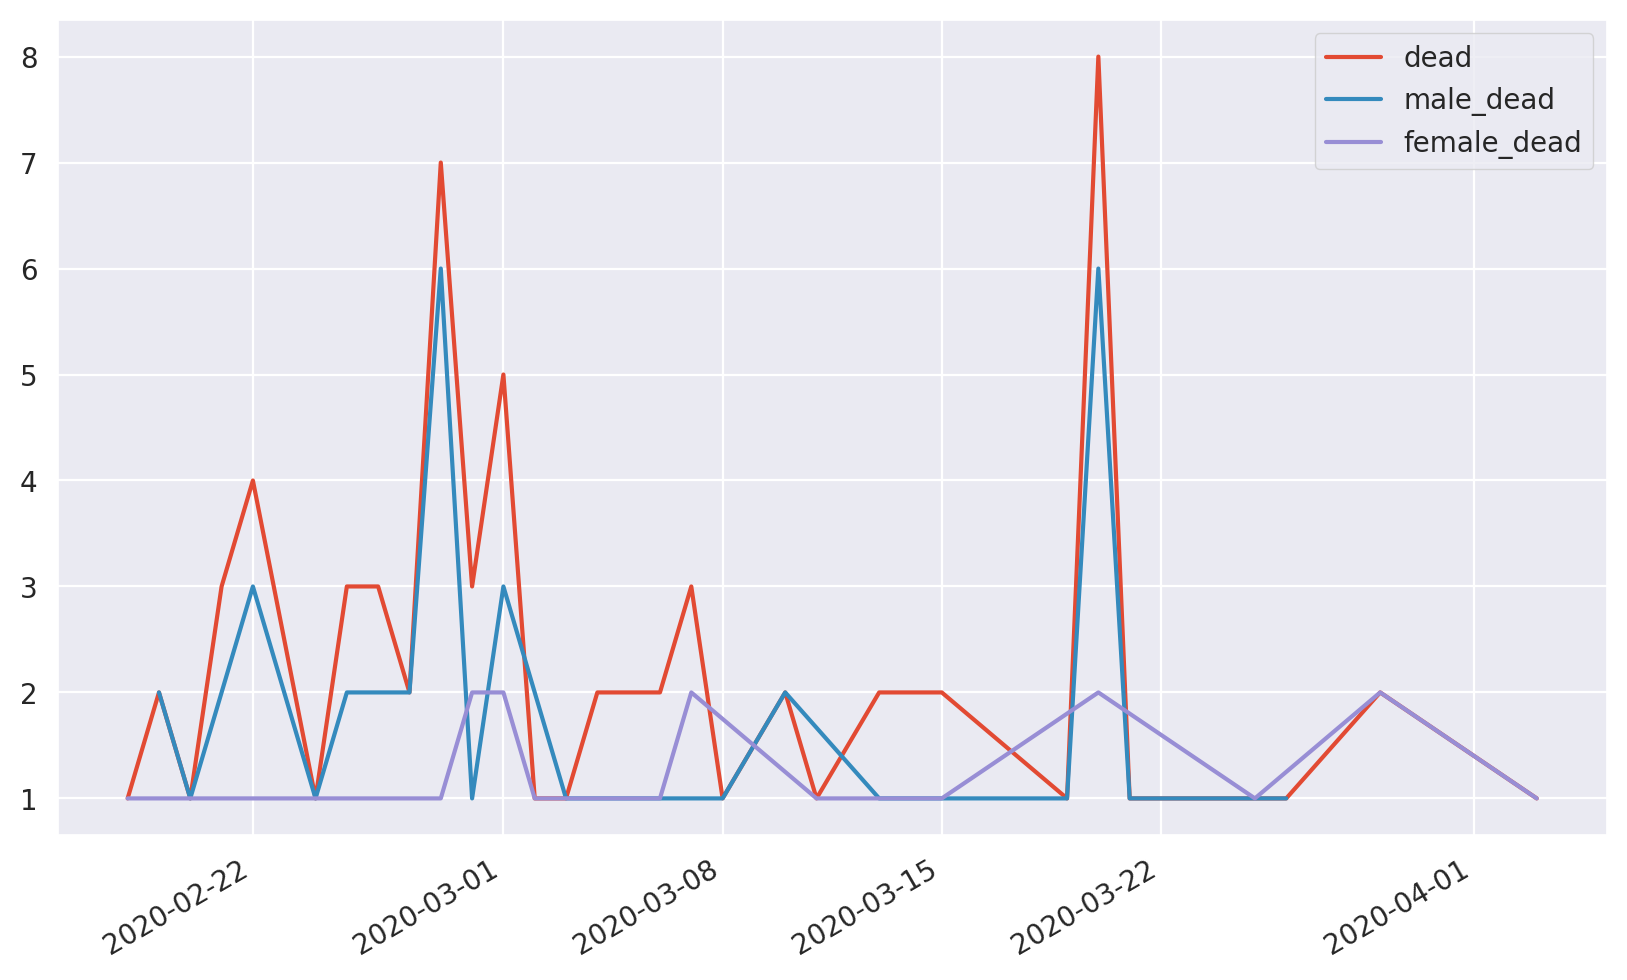

In [135]:
plt.figure(figsize=(10,6),dpi=200)
pd.to_datetime(dead.confirmed_date).value_counts().plot(label='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead') #날짜는 날짜 타입으로 변화줘야함
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()